In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
import seaborn as sns
import pandas as pd
sns.set_style("dark")

In [35]:
raw = pd.read_csv("inflacao.txt", decimal=",", sep="\t", names=["inflacao"])
raw = raw[raw.inflacao < 1.5]

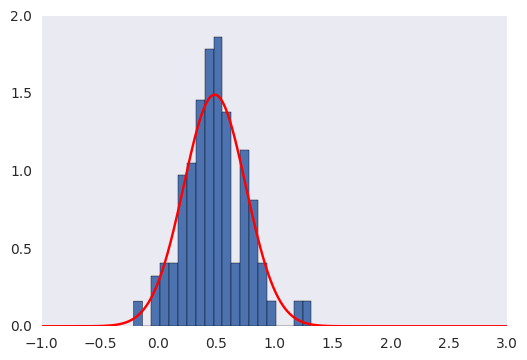

In [37]:
x = np.linspace(-1, 3, 1e4)
y = st.norm.pdf(x, loc=np.mean(raw.inflacao), scale=np.std(raw.inflacao))
plt.plot(x, y, 'r-')
plt.hist(raw.inflacao, bins=20, normed=True)
plt.show()

In [200]:
Nsimul = int(1e4)


conta_inicial = 150
anos_simul = 13
N = anos_simul * 12
tempo = np.arange(N)
tempoo = np.arange(N+1)


inicial_corrigido_final = []
soma_tesouro_final = []

for n in range(Nsimul):
    
    investimento = 12000
    contas = np.ones(N+1) * conta_inicial
    inflacao = np.random.randn(N) * np.std(raw.inflacao) + np.mean(raw.inflacao)
    rendimento_tesouro = inflacao * 1.055 + np.random.randn(N) * 0.005

    inicial_corrigido = np.zeros(N+1)
    inicial_corrigido[0] = investimento

    soma_tesouro = np.zeros(N+1)
    soma_tesouro[0] = investimento

    for i in range(1, N+1):
        if (i-1) % 12 == 0:
            if i < 12:
                acumulado = 1
            else:
                acumulado = np.sum(inflacao[i:(i+12)])
            contas[i:] = contas[i] * (1 + acumulado / 100)
        soma_tesouro[i] = soma_tesouro[i - 1] * (1 + rendimento_tesouro[i - 1] / 100) - contas[i]
        inicial_corrigido[i] = inicial_corrigido[i - 1] * (1 + inflacao[i - 1] / 100)
        
    inicial_corrigido_final.append(inicial_corrigido)
    soma_tesouro_final.append(soma_tesouro)
inicial_corrigido_final = np.array(inicial_corrigido_final)
soma_tesouro_final = np.array(soma_tesouro_final)

avg_inicial = np.zeros(N+1)
avg_tesouro = np.zeros(N+1)
std_inicial = np.zeros(N+1)
std_tesouro = np.zeros(N+1)
for i in range(N+1):
    avg_inicial[i] = np.mean(inicial_corrigido_final.T[i])
    avg_tesouro[i] = np.mean(soma_tesouro_final.T[i])
    
    std_inicial[i] = np.std(inicial_corrigido_final.T[i])
    std_tesouro[i] = np.std(soma_tesouro_final.T[i])

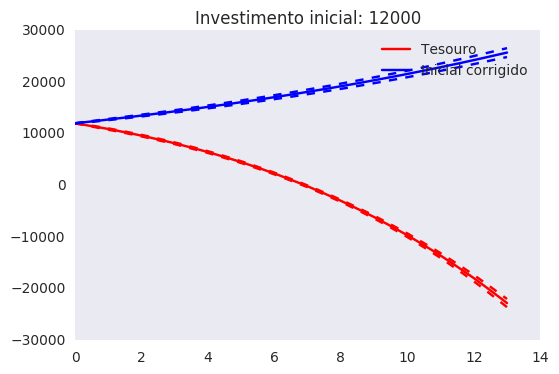

In [201]:
plt.title("Investimento inicial: %s" % investimento)
plt.plot(tempoo / 12, avg_tesouro + std_tesouro, 'r--')
plt.plot(tempoo / 12, avg_tesouro, 'r-', label="Tesouro")
plt.plot(tempoo / 12, avg_tesouro - std_tesouro, 'r--')
plt.plot(tempoo / 12, avg_inicial + std_inicial, 'b--')
plt.plot(tempoo / 12, avg_inicial, 'b-', label="Inicial corrigido")
plt.plot(tempoo / 12, avg_inicial - std_inicial, 'b--')
plt.legend()
plt.show()

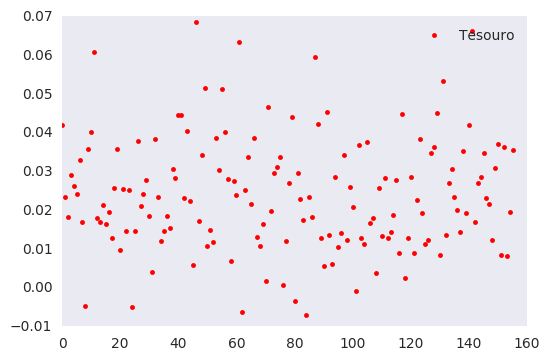

In [65]:
n = np.arange(len(raw.inflacao))
plt.plot(tempo, rendimento_tesouro - inflacao, 'r.', label='Tesouro')
plt.legend()
plt.show()

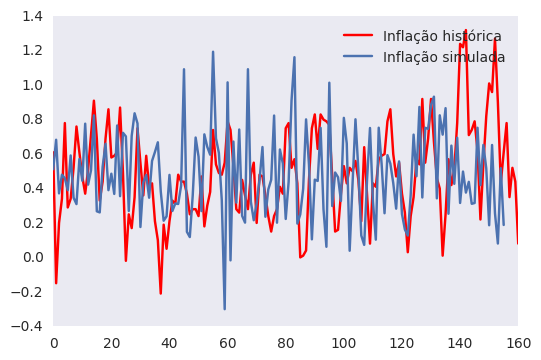

In [58]:
n = np.arange(len(raw.inflacao))
plt.plot(n, raw.inflacao, 'r-', label='Inflação histórica')
plt.plot(tempo, inflacao, label="Inflação simulada")
plt.legend()
plt.show()